In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [6]:
datos=r'''C:\Users\Jose Fabian Cardona\Desktop\Project_Data_01\DA2020.xlsx'''

data_lab= pd.DataFrame(pd.read_excel(datos))
data_lab.describe 

<bound method NDFrame.describe of               ADM_APP_DATE Date de fin de saisie   Date de lancement  \
0      2020-02-14 08:04:51   2020-02-10 15:07:15 2020-01-03 15:53:03   
1      2020-02-14 08:04:51   2020-02-10 15:07:15 2020-01-03 15:53:03   
2      2020-02-14 08:04:51   2020-02-10 15:07:15 2020-01-03 15:53:03   
3      2020-02-14 08:04:51   2020-02-10 15:07:15 2020-01-03 15:53:03   
4      2020-02-14 08:04:51   2020-02-10 15:07:15 2020-01-03 15:53:03   
...                    ...                   ...                 ...   
166263 2021-01-08 10:17:02   2021-01-06 13:21:47 2021-01-05 13:22:39   
166264 2021-01-08 10:18:12   2021-01-06 13:22:17 2021-01-05 13:22:54   
166265 2021-01-27 11:15:43   2021-01-25 19:10:40 2021-01-05 13:23:13   
166266 2021-02-10 08:07:50   2021-02-04 07:15:10 2021-01-05 13:23:37   
166267 2021-02-10 08:01:15   2021-02-04 07:15:46 2021-01-05 13:23:54   

                 PREPADATE Statut       TECH_APP_DATE   Enregistrement DA  \
0      2020-01-03 15:51:

In [7]:

# Preparar la variable de fechas

data_lab['TECH_APP_DATE'] = pd.to_datetime(data_lab['TECH_APP_DATE'])
data_lab['dia'] = data_lab['TECH_APP_DATE'].dt.day
data_lab['mes'] = data_lab['TECH_APP_DATE'].dt.month
data_lab['anio'] = data_lab['TECH_APP_DATE'].dt.year
data_lab = data_lab.drop('TECH_APP_DATE', axis=1)

In [8]:
data_lab.columns

Index(['ADM_APP_DATE', 'Date de fin de saisie', 'Date de lancement',
       'PREPADATE', 'Statut', 'Enregistrement DA', 'Status', 'Ouverture DA',
       'Folder #', 'Numero commande interne', 'Company', 'METHOD', 'Team',
       'dia', 'mes', 'anio'],
      dtype='object')

In [9]:
dat = data_lab.groupby(['METHOD', 'Team', 'Company', 'mes']).size().reset_index(name='counts')
dat.head()

,METHOD,Team,Company,mes,counts
0,Act. Bactéricide surface,Biocides,ESSAIS INTERCOMPARAISON,1.0,1
1,Act. Bactéricide surface,Biocides,ESSAIS INTERCOMPARAISON,10.0,1
2,Act. Bactéricide surface,Biocides,EYREIN INDUSTRIE,3.0,9
3,Act. Bactéricide surface,Biocides,EYREIN INDUSTRIE,7.0,37
4,Act. Bactéricide surface,Biocides,MC BRIDE SAS,5.0,2


## Recherches des valeurs NULL O NA

In [8]:
dat.isna().count().values.any()
#true 
dat.dropna().count()
#dat.isna().count().values.any()

METHOD     2433
Team       2433
Company    2433
mes        2433
counts     2433
dtype: int64

In [9]:
print('number is na:', dat.isna().values.sum())

number is na: 0


In [10]:
dat.describe

<bound method NDFrame.describe of                             METHOD         Team                    Company  \
0         Act. Bactéricide surface     Biocides    ESSAIS INTERCOMPARAISON   
1         Act. Bactéricide surface     Biocides    ESSAIS INTERCOMPARAISON   
2         Act. Bactéricide surface     Biocides           EYREIN INDUSTRIE   
3         Act. Bactéricide surface     Biocides           EYREIN INDUSTRIE   
4         Act. Bactéricide surface     Biocides               MC BRIDE SAS   
...                            ...          ...                        ...   
2428   Validation LAL Colorimétrie  Endotoxines  PROVEPHARM LIFE SOLUTIONS   
2429   Validation LAL Colorimétrie  Endotoxines                     SEPPIC   
2430   Validation LAL Colorimétrie  Endotoxines                     VIRBAC   
2431  Validation LAL Turbidimétrie  Endotoxines              INTERVASCULAR   
2432  Validation LAL Turbidimétrie  Endotoxines              INTERVASCULAR   

       mes  counts  
0      1

## Estacionalite pour mois de l'anne

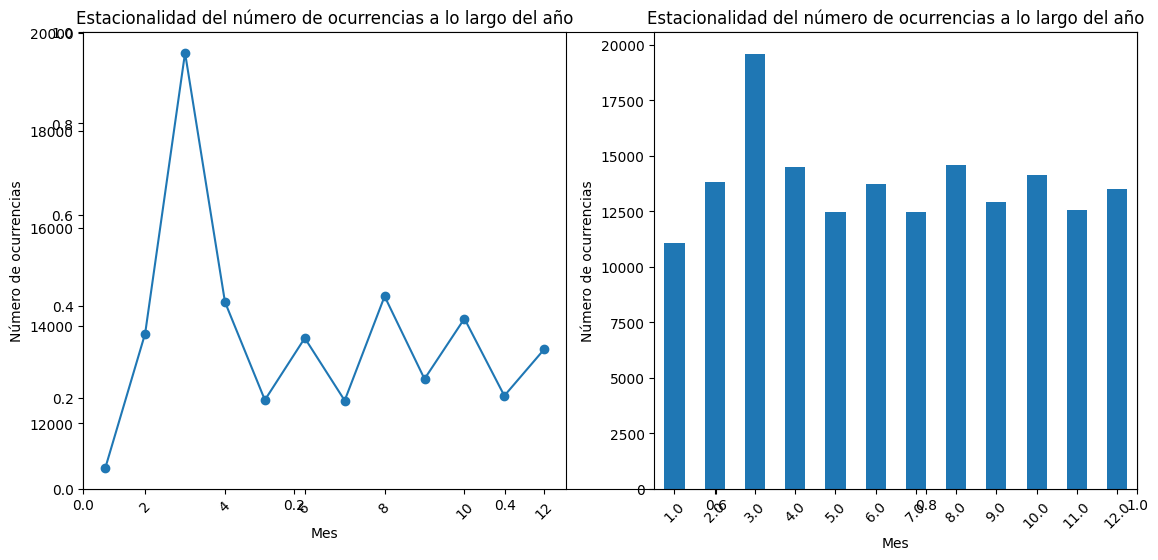

In [10]:
monthly_occurrences = dat.groupby('mes')['counts'].sum()

fig, axs = plt.subplots(figsize=(12, 6))

# premier graphique
plt.subplot(1, 2, 1)

monthly_occurrences.plot(kind='line', marker='o')
plt.xlabel('Mes')
plt.ylabel('Número de ocurrencias')
plt.title('Estacionalidad del número de ocurrencias a lo largo del año')
plt.xticks(rotation=45)


# deuxieme graphique
plt.subplot(1, 2, 2)

monthly_occurrences.plot(kind='bar')
plt.xlabel('Mes')
plt.ylabel('Número de ocurrencias')
plt.title('Estacionalidad del número de ocurrencias a lo largo del año')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Methode plus solicite

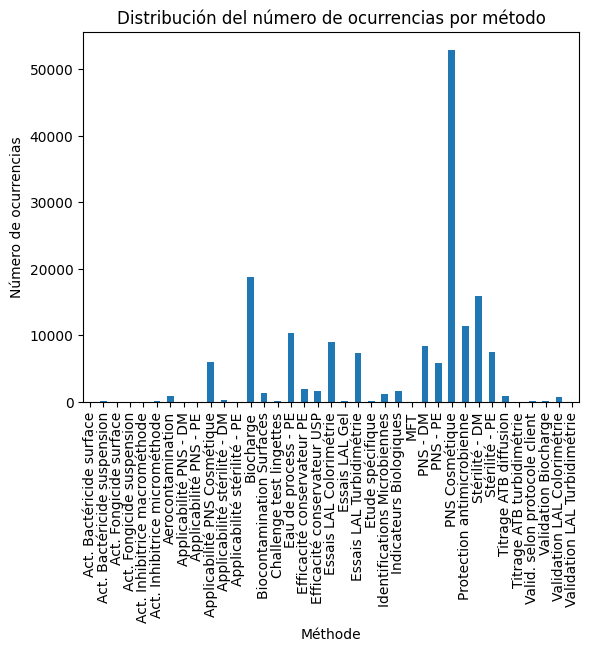

In [12]:

# Calcular la distribución del número de ocurrencias por método
method_distribution = dat.groupby('METHOD')['counts'].sum()

# Graficar la distribución
method_distribution.plot(kind='bar')
plt.xlabel('Méthode')
plt.ylabel('Número de ocurrencias')
plt.title('Distribución del número de ocurrencias por método')
plt.show()


## Company plus Concurrences au labo

<function matplotlib.pyplot.show(close=None, block=None)>

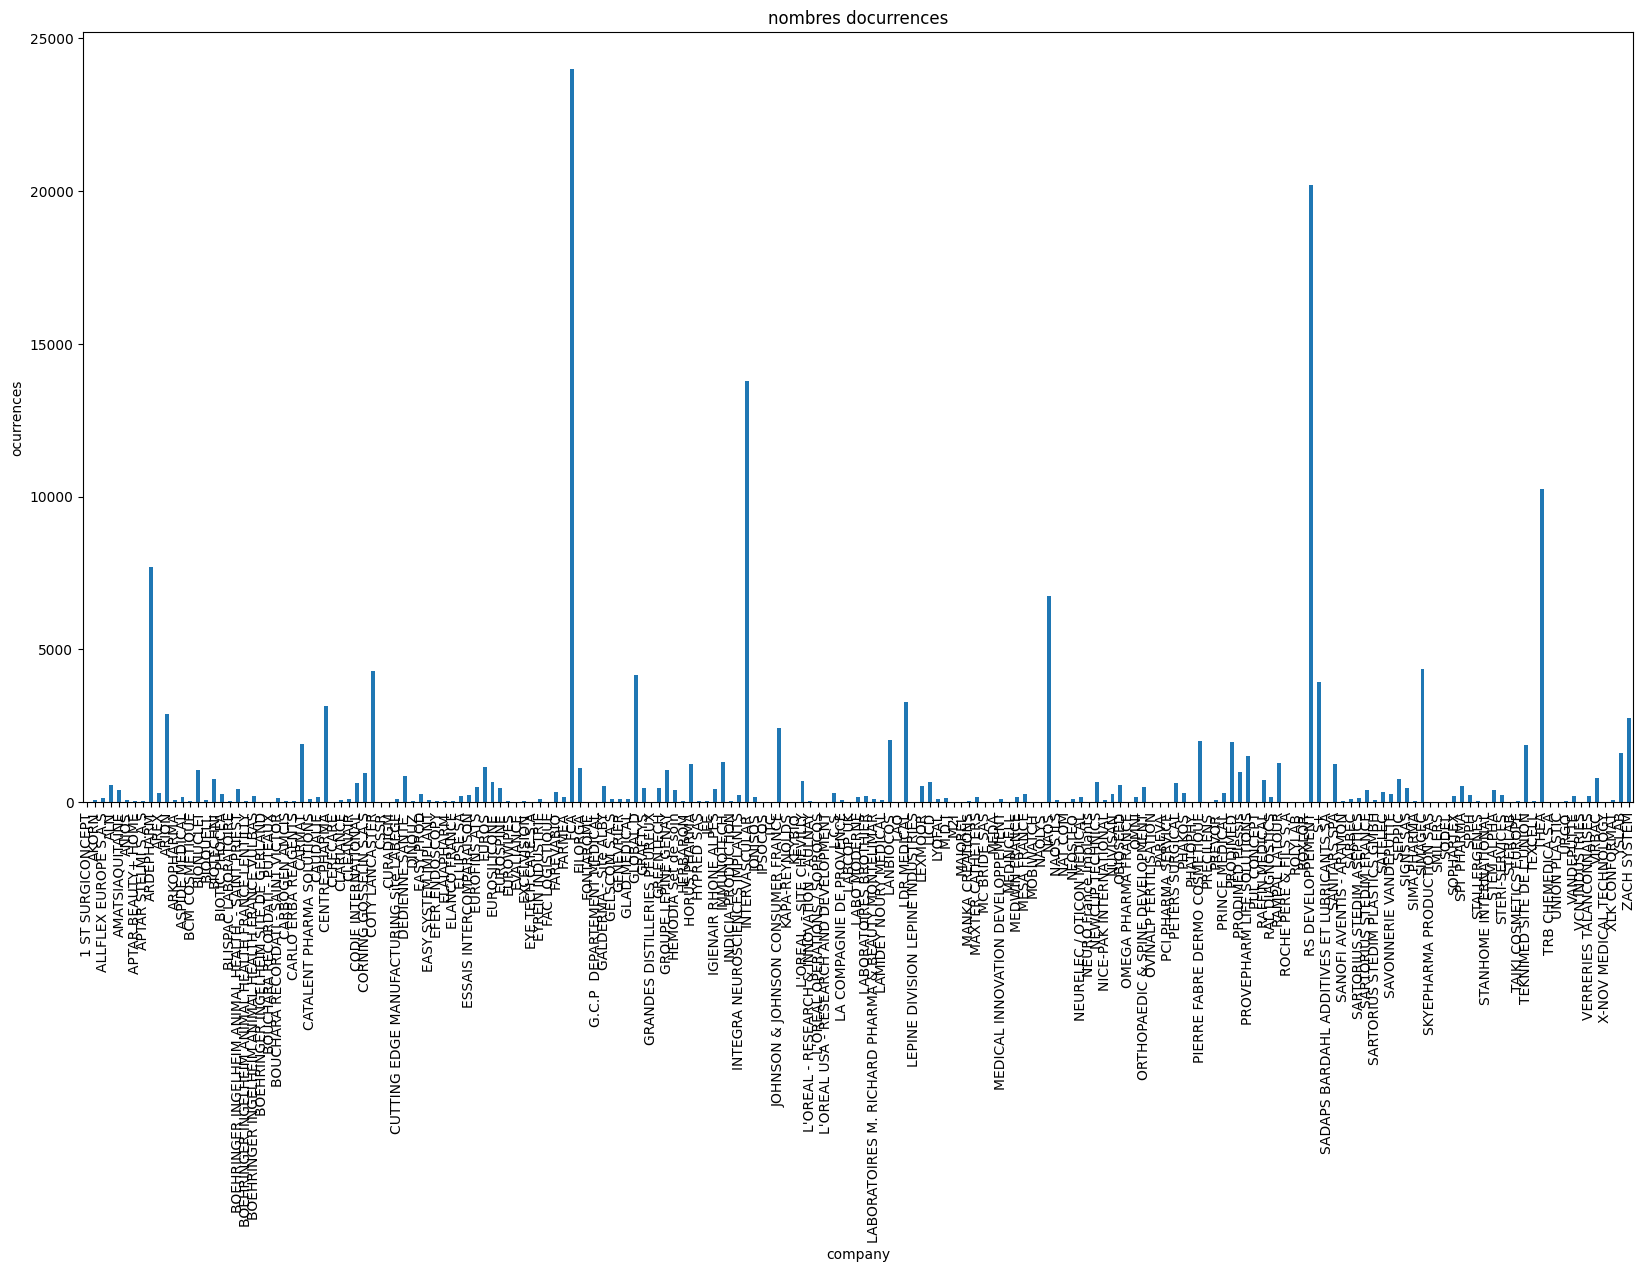

In [13]:
Company_performance= dat.groupby('Company')['counts'].sum()
plt.figure(figsize=(20, 10))
Company_performance.plot(kind='bar')
plt.xlabel('company')
plt.ylabel('ocurrences')
plt.title('nombres docurrences')
plt.show

# Team - Equipe 

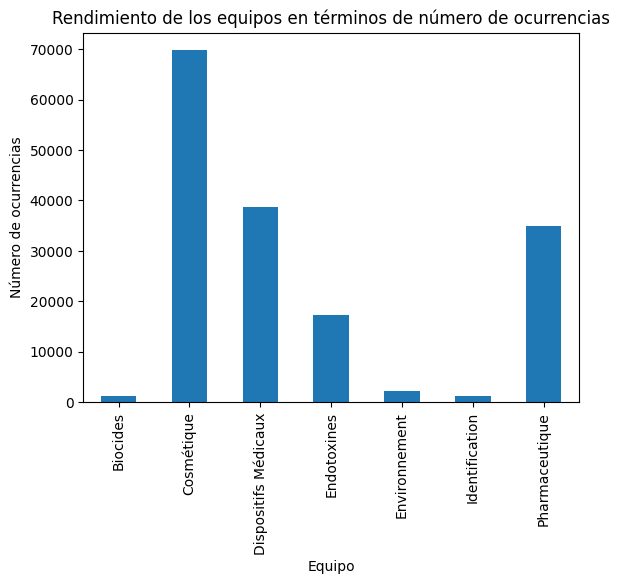

In [14]:
team_performance = dat.groupby('Team')['counts'].sum()
team_performance.plot(kind='bar')
plt.xlabel('Equipo')
plt.ylabel('Número de ocurrencias')
plt.title('Rendimiento de los equipos en términos de número de ocurrencias')
plt.show()

### Correlation

<Axes: >

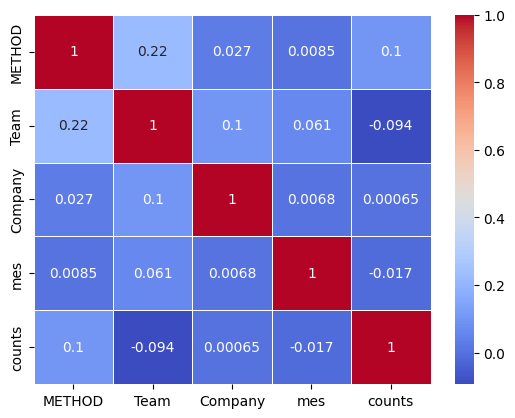

In [17]:
corr_matrix = dat.corr(method='pearson')

# Plot the correlation map
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the correlation map

### Prétraitement

In [18]:
# Codification variable categorique
label_encoders = {}
for column in dat.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dat[column] = le.fit_transform(dat[column])
    label_encoders[column] = le

In [16]:
X = dat.drop('Company', axis=1)
y = dat['Company']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modele Random Forest Classifier

In [19]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [22]:
# evaluation random
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier
Accuracy: 0.1437371663244353
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         5
           4       0.33      0.25      0.29         4
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.60      0.43      0.50         7
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         1
          15       0.00   

c:\Users\Jose Fabian Cardona\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jose Fabian Cardona\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jose Fabian Cardona\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this

### Modele Regresion

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [24]:
# evaluation regresion
print("Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression
Mean Squared Error: 3500.9178632911844
Root Mean Squared Error: 59.168554683135405


### Visualisation

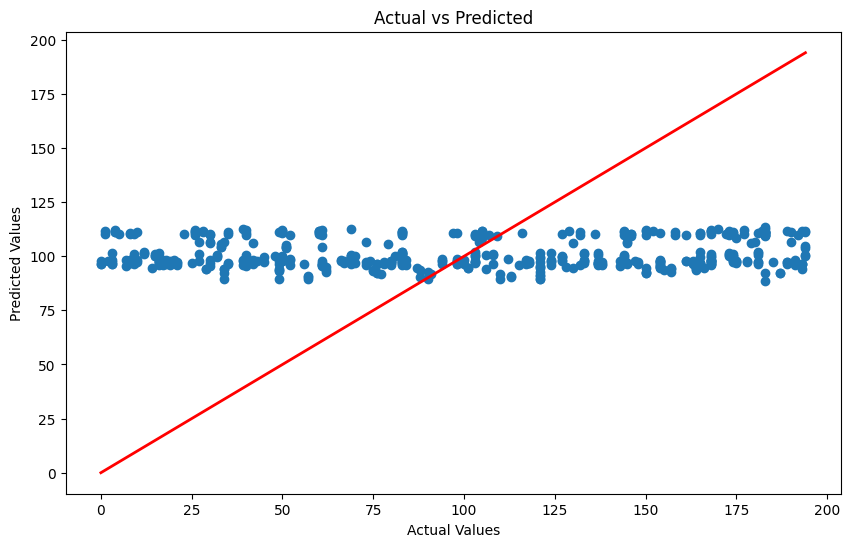

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## Conclusion

-La stacionalite demontre que le mois de l'anne qui il ya plus des essais es le mois de mars 

-L'equipe qui recoit le plus de travail c'est cosmetique  

-Les entreprises qui envoient la plupart des analyses à effectuer sont FCA, THEA, INTERVASCULAR, RS DEVELEPEMENT, ces entreprises sont les principaux clients de keybio.
